In [22]:
import cv2
import sys
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from utilis import plot_image,Canny_edge_detector
from LineDetection import *
from CirclesDetection import *



## 1. Line Detection :

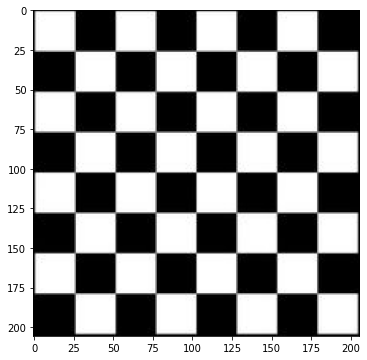

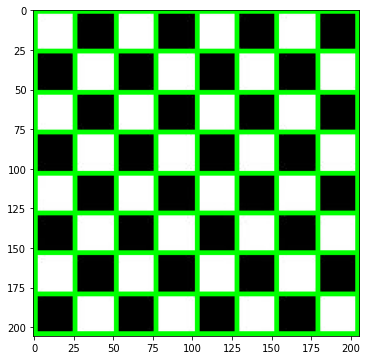

In [5]:
Original_Image=cv2.imread('images/chess.jpeg')
plot_image(img=Original_Image)
canny_edges=Canny_edge_detector('images/chess.jpeg')
Hough_Accumulator, rhos, thetas = hough_lines_acc(canny_edges)
indicies, Hough_Accumulator = hough_peaks(Hough_Accumulator, 18, nhood_size=11) # find peaks
hough_lines_draw(Original_Image, indicies, rhos, thetas)

# Show image with manual Hough Transform Lines
plot_image(img=Original_Image)

## 2. Circle Detection :

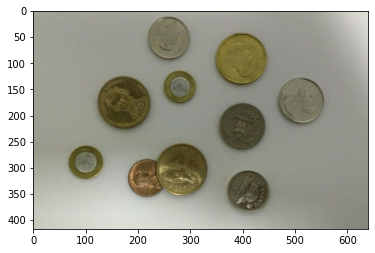

0.65 217 320 37
0.63 280 147 32
0.59 400 221 45
0.56 100 290 33
0.54 397 93 50
0.48 284 303 50
0.47 175 177 50
0.4 411 347 42
0.38 259 51 40
0.33 513 172 43


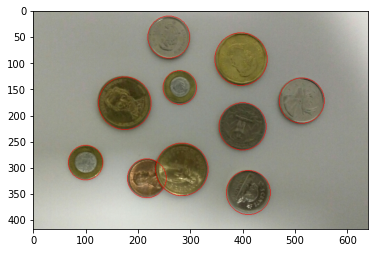

In [12]:

input_image = Image.open("images/coins.jpg")
plot_image(img=input_image)
output_image=circlesdetection(input_image,rmin=18,rmax=50,steps=100,threshold=0.3)
plot_image(img=output_image)

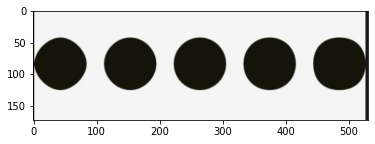

0.85 264 84 42
0.79 154 84 42
0.68 485 84 43
0.67 375 84 42
0.61 43 84 41


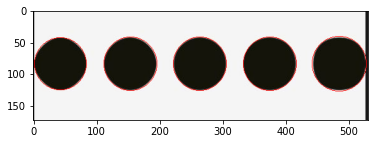

In [13]:
input_image = Image.open("images/circles.JPG")
plot_image(img=input_image)
output_image=circlesdetection(input_image,rmin=18,rmax=50,steps=100,threshold=0.3)
plot_image(img=output_image)

## 3. Active Contour (snake) :

In [31]:
import snake
# Process command line arguments 
file_to_load = 'images/circles.JPG'
if len(sys.argv) > 1:
    file_to_load = sys.argv[1]

# Loads the desired image
#image = cv2.imread(  'images/circle.jpg', cv2.IMREAD_COLOR ) # ex1
image = cv2.imread(  'images/example.jpg', cv2.IMREAD_COLOR ) # ex2
#image = cv2.imread(  'images/example3.jpg', cv2.IMREAD_COLOR ) # ex3
#image = cv2.imread(  'images/Capture.PNG', cv2.IMREAD_COLOR ) # ex4

# Creates the snake
snake = snake.Snake( image, closed = True )

# Window, window name and trackbars
snake_window_name = "Snakes"
cv2.namedWindow( snake_window_name )

# Core loop
while( True ):

    # Gets an image of the current state of the snake
    snakeImg = snake.visualize()
    # Shows the image
    cv2.imshow( snake_window_name, snakeImg )
    # Processes a snake step
    snake_changed = snake.step()

    # Stops looping when ESC pressed
    k = cv2.waitKey(33)
    if k == 27:
        break

cv2.destroyAllWindows()

# perimeter and area
snake_length = snake.get_length()
snake_area = snake.get_area_shoelace()
print("The perimeter =", snake_length)
print("The area =", snake_area)

620 620
620 620 624
The perimeter = 17.804493814764857
The area = 96015.5
